In [1]:
def create17Cards():
    suit = ["♥", "♣", "♦", "♠"]
    num = ["K", "Q", "J", "A"]
    cards = ["jk"]
    for s in suit:
        for n in num:
            cards.append(s+n)  
    return cards;
create17Cards()


['jk',
 '♥K',
 '♥Q',
 '♥J',
 '♥A',
 '♣K',
 '♣Q',
 '♣J',
 '♣A',
 '♦K',
 '♦Q',
 '♦J',
 '♦A',
 '♠K',
 '♠Q',
 '♠J',
 '♠A']

In [41]:
def riffleShuffle(cards, count):
    temp = [0]*len(cards)
    cardsA = []
    cardsB = []
    for i in range(count):
        cardsA = cards[:8]
        cardsB = cards[8:]
        for b in range(len(cardsB)):
            temp[b*2] = cardsB[b]
        for a in range(len(cardsA)):
            temp[2*a+1] = cardsA[a]
        cards = temp
    return cards

SyntaxError: can't assign to operator (<ipython-input-41-4651444b8af6>, line 2)

In [3]:
cards = create17Cards()
for i in range(9):
    print(riffleShuffle(cards, i))
    cards = create17Cards()

def j_pos(n):
    if n==0:
        return 0
    else:
        return ((j_pos(n-1)+2**(n-1))%17)
j_pos(6)

['jk', '♥K', '♥Q', '♥J', '♥A', '♣K', '♣Q', '♣J', '♣A', '♦K', '♦Q', '♦J', '♦A', '♠K', '♠Q', '♠J', '♠A']
['♣A', 'jk', '♦K', '♥K', '♦Q', '♥Q', '♦J', '♥J', '♦A', '♥A', '♠K', '♣K', '♠Q', '♣Q', '♠J', '♣J', '♠A']
['♦A', '♣A', '♥A', 'jk', '♠K', '♦K', '♣K', '♥K', '♠Q', '♦Q', '♣Q', '♥Q', '♠J', '♦J', '♣J', '♥J', '♠A']
['♠Q', '♦A', '♦Q', '♣A', '♣Q', '♥A', '♥Q', 'jk', '♠J', '♠K', '♦J', '♦K', '♣J', '♣K', '♥J', '♥K', '♠A']
['♠J', '♠Q', '♠K', '♦A', '♦J', '♦Q', '♦K', '♣A', '♣J', '♣Q', '♣K', '♥A', '♥J', '♥Q', '♥K', 'jk', '♠A']
['♣J', '♠J', '♣Q', '♠Q', '♣K', '♠K', '♥A', '♦A', '♥J', '♦J', '♥Q', '♦Q', '♥K', '♦K', 'jk', '♣A', '♠A']
['♥J', '♣J', '♦J', '♠J', '♥Q', '♣Q', '♦Q', '♠Q', '♥K', '♣K', '♦K', '♠K', 'jk', '♥A', '♣A', '♦A', '♠A']
['♥K', '♥J', '♣K', '♣J', '♦K', '♦J', '♠K', '♠J', 'jk', '♥Q', '♥A', '♣Q', '♣A', '♦Q', '♦A', '♠Q', '♠A']
['jk', '♥K', '♥Q', '♥J', '♥A', '♣K', '♣Q', '♣J', '♣A', '♦K', '♦Q', '♦J', '♦A', '♠K', '♠Q', '♠J', '♠A']


12

In [4]:
def cut(cards, n):
    n = max(min(n, len(cards)), 0);
    cardsA = cards[:n]
    cardsB = cards[n:]
    return cardsB+cardsA
def j_pos_cut(pos, cut):
    return (pos-cut)%17


In [5]:
import random
cards = create17Cards()
for i in range(9):
    cards = riffleShuffle(cards, i)
    num = random.randint(0,len(cards))
    cards = cut(cards,num)
    pos = j_pos_cut(j_pos(i),num)
    
    num2 = random.randint(0,len(cards))
    cards = cut(cards,num2)
    pos = j_pos_cut(pos,num2)
    
    cards = create17Cards()

In [35]:
import matplotlib.pyplot as plt
def main(count = random.randint(1,8),
    num = random.randint(0, 16), cheat=False):
    cards = create17Cards()
    cards = riffleShuffle(cards, count)
    cards = cut(cards, num)
    if cheat:
        num2 = j_pos_cut(j_pos(count),num+1)
    else:
        num2 = random.randint(0,len(cards))
    cards = cut(cards, num2)
    decks = [[],[]]
    for i in range(10):
        decks[i % 2].append(cards.pop(0));   
    return decks
win = 0
e = 0
ajk = 0
ajk_win = 0
bjk = 0
bjk_win = 0
aList=[]
bList=[]
aJK = []
aJKwin = []
bJK = []
bJKwin=[]
for x in range(100):
    for i in range(10000):
    #     d = main(count = random.randint(1,8),num= random.randint(0,16),cheat=True)
        d = main(count = random.randint(1,8),num= random.randint(0,16))
        p1 = d[0]
        p2 = d[1]
        r1 = yaku(p1)
        r2 = yaku(p2)
        if "jk" in p2:
            ajk+=1
            #r2 win
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
                ajk_win+=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
        elif "jk" in p1:
            bjk+=1
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
                bjk_win+=1
        else:
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
    print(ajk_win/ajk)
    aList.append(win/(win+e))
    bList.append(e/(win+e))
    aJK.append(ajk/(win+e))
    aJKwin.append(ajk_win/ajk)
    bJK.append(bjk/(win+e))
    bJKwin.append(bjk_win/bjk)
    win = 0
    e = 0
    ajk = 0
    ajk_win = 0
    bjk=0
    bjk_win=0

0.9710675091453276
0.9754291484348704
0.9744847890088322
0.9705484089370345
0.9730209442669506
0.9764863957003695
0.9770942408376964
0.9716288384512684
0.9696335078534032
0.9768885822697482
0.9720093302232589
0.9751638496033115
0.9713515335355578
0.9799307958477509
0.9751724137931035
0.9746192893401016
0.9771941948859709
0.9771351714862139
0.9713128585892676
0.9791879904469465
0.9711699631243714
0.9752374491180461
0.976214405360134
0.973816717019134
0.9777397260273972
0.9782386943216593
0.9714580467675378
0.9773039889958735
0.9749313186813187
0.9803921568627451
0.9773725092874029
0.9756179024716098
0.9740777666999003
0.9742110620970479
0.9752556911910261
0.9748709122203099
0.9758620689655172
0.9725016767270288
0.9757281553398058
0.9732453092425295
0.9800675675675675
0.9766180955608268
0.9793640054127198
0.97771124417831
0.9775204359673024
0.9758009543285617
0.9739815131804177
0.9729368526561978
0.9746125947906363
0.972324108036012
0.9715543515069421
0.9734151329243353
0.975786924939467

Population mean: 0.49976400000000004 Population std: 0.48106682792445055


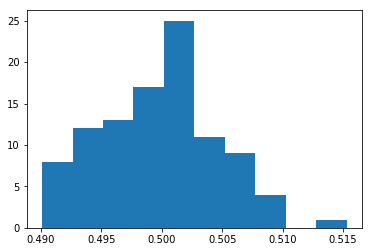

In [79]:

import numpy as np
print("Population mean:",np.mean(bList), "Population std:",100*np.std(bList,ddof=1))
plt.figure()
plt.hist(bList)
plt.show()

Population mean: 0.9745943922120247 Population std: 0.3205204265732617


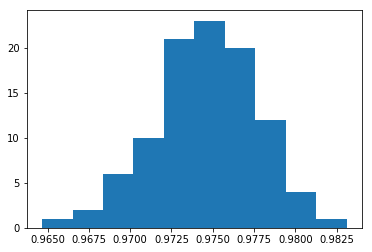

In [64]:
print("Population mean:",np.mean(bJKwin), "Population std:",100*np.std(bJKwin,ddof=1))
plt.figure()
plt.hist(bJKwin)
plt.show()


Population mean: 0.293686 Population std: 0.4040752505175342


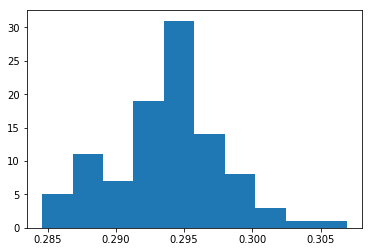

In [60]:
print("Population mean:",np.mean(bJK), "Population std:",100*np.std(bJK,ddof=1))
plt.figure()
plt.hist(bJK)
plt.show()

In [49]:
import numpy as np
d = {1:"Five Cards", 2:"RSF", 3:"Four Cards", 4:"Full House", 5:"ST", 6:"Three Cards", 7:"Two Pair", 8:"One Pair"}
j_win = 0
j = 0
win = 0
draw = 0
rows, cols = (9, 17) 
ary = [[0 for i in range(cols)] for j in range(rows)] 
ary2 = [[0 for i in range(cols)] for j in range(rows)] 
ary3 = [[0 for i in range(cols)] for j in range(rows)] 
num_try = 5000
t_win = 0
win_total = 0
t_wintotal = 0
for ct in range(1,17):
    for sfl in range(1,9):
        for i in range(num_try):
            decks = main(count=sfl,num=ct)
            p1 = decks[0]
            p2 = decks[1]
            yaku1 = yaku(p1)
            yaku2 = yaku(p2)
            if "jk" in p1:
                j+=1
                if yaku1 < yaku2 or (yaku1 == yaku2 and same(p1,p2,yaku1)):
                    j_win +=1
                    win +=1
                elif yaku1 > yaku2 or (yaku1 == yaku2 and same(p2,p1,yaku1)):
                    t_win+=1
                else:
                    draw+=1
            elif yaku1 < yaku2 or (yaku1 == yaku2 and same(p1,p2,yaku1)) :
                win+=1
            elif yaku1 > yaku2 or (yaku1 == yaku2 and same(p2,p1,yaku1)) :
                t_win+=1
            else:
                draw+=1
            
        #print("percent joker:", j/10000, "percent win with joker:", j_win/j, "num suffle:", x,"num cut:", k)
        print("suffle:",sfl, "cut:", ct, "  ",j_win/j , "  ", j/num_try, "  ", (win+draw)/(num_try), " draw:",draw)
        ary[sfl][ct] = j_win/j
        ary2[sfl][ct] = j/num_try
        ary3[sfl][ct] = (win+draw)/num_try
        j_win = 0
        j = 0
        win_total+=win
        t_wintotal+=t_win
        win = 0
        t_win=0
        draw = 0
ary.pop(0)
ary2.pop(0)
ary3.pop(0)
for a in ary:
    a.pop(0)
for b in ary2:
    b.pop(0)
for c in ary3:
    c.pop(0)
print("teki win:",t_wintotal, "my win:", win_total, "rate:", win_total/(win_total+t_wintotal))
result = np.array(ary)
result2 = np.array(ary2)
result3 = np.array(ary3)

suffle: 1 cut: 1    1.0    0.3328    0.6696  draw: 0
suffle: 2 cut: 1    1.0    0.3294    0.609  draw: 0
suffle: 3 cut: 1    1.0    0.3338    0.51  draw: 0
suffle: 4 cut: 1    0.7990056818181818    0.2816    0.337  draw: 0
suffle: 5 cut: 1    1.0    0.2692    0.3268  draw: 0
suffle: 6 cut: 1    1.0    0.277    0.3868  draw: 0
suffle: 7 cut: 1    1.0    0.2828    0.5124  draw: 0
suffle: 8 cut: 1    1.0    0.2684    0.668  draw: 0
suffle: 1 cut: 2    1.0    0.2772    0.669  draw: 0
suffle: 2 cut: 2    1.0    0.2756    0.556  draw: 0
suffle: 3 cut: 2    1.0    0.2736    0.4424  draw: 0
suffle: 4 cut: 2    0.8156028368794326    0.282    0.3404  draw: 0
suffle: 5 cut: 2    1.0    0.2852    0.34  draw: 0
suffle: 6 cut: 2    1.0    0.28    0.387  draw: 0
suffle: 7 cut: 2    1.0    0.3378    0.5466  draw: 0
suffle: 8 cut: 2    1.0    0.2768    0.664  draw: 0
suffle: 1 cut: 3    1.0    0.2776    0.6576  draw: 0
suffle: 2 cut: 3    1.0    0.343    0.6102  draw: 0
suffle: 3 cut: 3    1.0    0.330

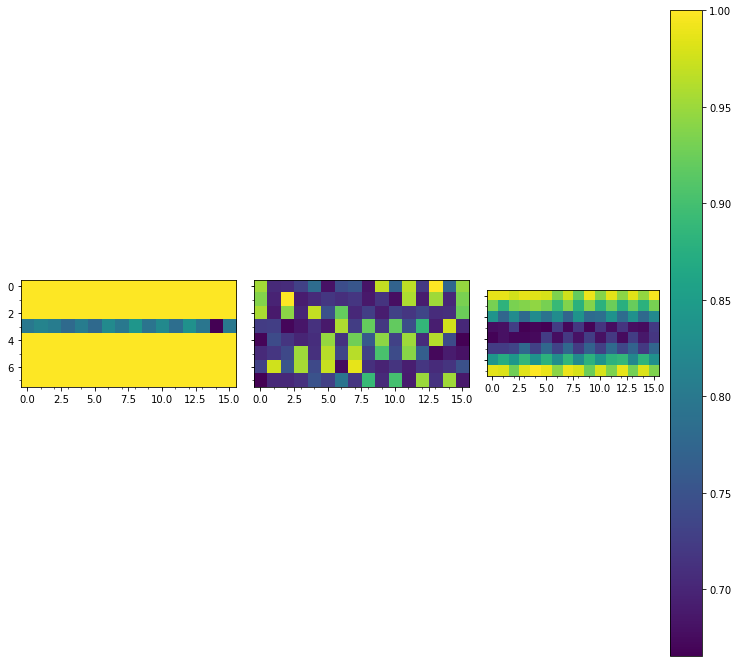

[[0.6696 0.669  0.6576 0.6688 0.6652 0.6612 0.614  0.6566 0.5974 0.6742
  0.6172 0.6682 0.621  0.666  0.6246 0.6778]
 [0.609  0.556  0.6102 0.616  0.6228 0.6096 0.566  0.6144 0.553  0.6166
  0.5536 0.6016 0.5498 0.5996 0.5526 0.609 ]
 [0.51   0.4424 0.4972 0.4464 0.4962 0.4602 0.4988 0.4412 0.508  0.4498
  0.4542 0.5062 0.4512 0.505  0.4466 0.4928]
 [0.337  0.3404 0.39   0.3236 0.3286 0.325  0.3872 0.332  0.3818 0.3288
  0.3778 0.3374 0.3776 0.3386 0.3362 0.3844]
 [0.3268 0.34   0.3294 0.3298 0.3326 0.387  0.3374 0.383  0.341  0.3886
  0.3394 0.3838 0.334  0.3882 0.3462 0.38  ]
 [0.3868 0.387  0.3978 0.445  0.3924 0.4456 0.3962 0.445  0.3856 0.4364
  0.392  0.4472 0.3996 0.4376 0.3838 0.442 ]
 [0.5124 0.5466 0.5134 0.5604 0.5064 0.5544 0.5002 0.56   0.4958 0.5548
  0.5078 0.555  0.5618 0.4904 0.5574 0.5032]
 [0.668  0.664  0.6052 0.6664 0.6828 0.6712 0.6208 0.6722 0.6612 0.6026
  0.6608 0.612  0.6688 0.6078 0.6642 0.6136]]


In [82]:

import matplotlib
import matplotlib.pyplot as plt

suffleList = list(range(1,9))
cutList = list(range(1,17))

fig, (ax1,ax2, ax3) = plt.subplots(1,3, sharey="all", sharex="all", figsize=(10,15))
# fig, (ax1,ax2, ax3) = plt.subplots(3,1)
im = ax1.imshow(result)
im2 = ax2.imshow(result2)
im3 = ax3.imshow(result3)
# heatmap = ax1.pcolor(result, cmap=plt.cm.Blues)
# heatmap = ax2.pcolor(result2, cmap=plt.cm.Blues)
# heatmap = ax3.pcolor(result3, cmap=plt.cm.Blues)
ax1.set_xticks(np.arange(len(cutList)), cutList)
ax1.set_yticks(np.arange(len(suffleList)), suffleList)
# ax1.set_xticklabels(cutList)
# ax1.set_yticklabels(suffleList)
fig.tight_layout()
plt.colorbar(im)
plt.show()
print(result3)

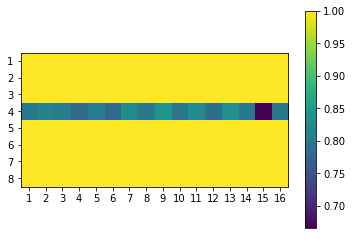

0.7971230301864003 0.038290693471273715 0.8409090909090909 0.6652868125369604 [0.79900568 0.81560284 0.80623608 0.78079179 0.80631277 0.7798098
 0.8257485  0.79914833 0.84090909 0.79457917 0.82410824 0.78601399
 0.8344871  0.79679534 0.66528681 0.79913295]


In [96]:
suffleList = list(range(1,9))
cutList = list(range(1,17))
plt.figure()
im = plt.imshow(result)
plt.xticks(np.arange(len(cutList)), ["1", "2","3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])
plt.yticks(np.arange(len(suffleList)), ["1", "2","3", "4", "5", "6", "7", "8"])
# plt.xticklabels(cutList)
# plt.yticklabels(suffleList)
fig.tight_layout()
plt.colorbar(im)
plt.show()
print(np.mean(result[3]), np.std(result[3]), max(result[3]), min(result[3]), result[3])

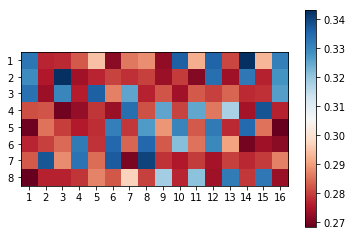

In [87]:
suffleList = list(range(1,9))
cutList = list(range(1,17))
plt.figure()
im = plt.imshow(result2, cmap=plt.cm.RdBu)
plt.xticks(np.arange(len(cutList)), ["1", "2","3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])
plt.yticks(np.arange(len(suffleList)), ["1", "2","3", "4", "5", "6", "7", "8"])
# plt.xticklabels(cutList)
# plt.yticklabels(suffleList)
fig.tight_layout()
plt.colorbar(im)
plt.show()

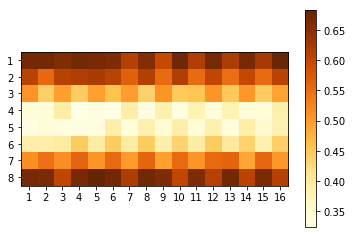

0.35164999999999996 0.024953907509646663
0.3542 0.0244481083112784
0.41375 0.025967720346614948


In [102]:
suffleList = list(range(1,9))
cutList = list(range(1,17))
plt.figure()
im = plt.imshow(result3, cmap=plt.cm.YlOrBr)
plt.xticks(np.arange(len(cutList)), ["1", "2","3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])
plt.yticks(np.arange(len(suffleList)), ["1", "2","3", "4", "5", "6", "7", "8"])
# plt.xticklabels(cutList)
# plt.yticklabels(suffleList)
fig.tight_layout()
plt.colorbar(im)
plt.show()
print(np.mean(result3[3]), np.std(result3[3]))
print(np.mean(result3[4]), np.std(result3[4]))
print(np.mean(result3[5]), np.std(result3[5]))         

In [7]:
def isfivecard(deck):
    num=""
    copy = deck.copy()
    if "jk" in copy:
        copy.remove("jk")
        num = copy[0][1]
        for i in range(1,4):
            if num != copy[i][1]:
                return False
        return True
def isRSF(deck):
    deck.sort()
    if (deck == ['jk', '♠A', '♠J', '♠K', '♠Q']
        or deck == ['jk', '♣A', '♣J', '♣K', '♣Q']
        or deck == ['jk', '♥A', '♥J', '♥K', '♥Q']
        or deck == ['jk', '♦A', '♦J', '♦K', '♦Q']):
        return True
    return False
def is4(deck):
    copy = deck.copy()
    if "jk" in copy:
        copy.remove("jk")
        if is3(copy,4):
            return True
        else:
            return False
    else:
        copy = removeMark(copy)
        copy.sort()
        count=0
        if copy[0] == copy[1]:
            num = copy[0]
        elif copy[-1] == copy[-2]:
            num = copy[-1]
        else:
            return False
        for i in copy:
            if i==num:
                count+=1
        return count==4
               
        
def isST(deck):
    x = ["J", "K", "A", "Q", "k"]
    for card in deck:
        try:
            x.remove(card[1])
        except ValueError:
            continue
    return len(x)==0

def isFull(deck):
    copy = deck.copy()
    if "jk" in copy:
        copy.remove("jk")
        return isTwo(copy,4)
    else:
        copy = removeMark(copy)
        copy.sort()
        return ((copy[0]==copy[1] and copy[1]==copy[2] and copy[3]==copy[4]) 
                or(copy[0]==copy[1] and copy[2]==copy[3] and copy[3]==copy[4]))
            
        
def is3(deck, num=5):
    copy = deck.copy()
    if "jk" in copy and not isST(deck):
        return True
    else:
        copy = removeMark(copy)
        copy.sort()
        if num == 5:
            return ((copy[0]==copy[1] and copy[1] == copy[2])
               or (copy[1]==copy[2] and copy[2] == copy[3])
               or (copy[2]==copy[3] and copy[3] == copy[4]))
        else:
            return ((copy[0]==copy[1] and copy[1]==copy[2]) 
               or (copy[1]==copy[2] and copy[2]==copy[3]))
def isTwo(deck, num=5):
    copy = deck.copy()
    copy = removeMark(copy)
    copy.sort()

    if num==5:
        return ((copy[0]==copy[1] and copy[2]==copy[3]) or (copy[1]==copy[2] and copy[3]==copy[4]) or (copy[0]==copy[1] and copy[3]==copy[4]))
    else:
        return (copy[0]==copy[1] and copy[2]==copy[3])
        

    
def removeMark(deck):
    newList = []
    for card in deck:
        newList.append(card[1])
    return newList

def yaku(deck):
    num=0
    if(isfivecard(deck)):
        num = 1
    elif(isRSF(deck)):
        num = 2
    elif(is4(deck)):
        num = 3
    elif(isFull(deck)):
        num = 4
    elif(isST(deck)):
        num = 5
    elif(is3(deck)):
        num = 6
    elif(isTwo(deck)):
        num = 7
    else:
        num = 8
    
    return num
    
        
def same(deck1, deck2, num):
    dic = {14:"A", 13:"K", 12:"Q", 11:"J"}
    if num==3 or num==4 or num ==6:
        return rmv_non3(deck1) > rmv_non3(deck2)
    elif num == 7:
        if two_pair(deck1)[0] > two_pair(deck2)[0]:
            return True
        elif two_pair(deck1)[0] == two_pair(deck2)[0]:
            if two_pair(deck1)[1] > two_pair(deck2)[1]:
                return True
            elif two_pair(deck1)[1] < two_pair(deck2)[1]:
                return False
            else:
                return "♠"+dic[two_pair(deck1)[0]] in deck1
        else:
            return False
    elif num==8:
        if one_pair(deck1) > one_pair(deck2):
            return True
        elif one_pair(deck1) < one_pair(deck2):
            return False
        else:
            return "♠"+dic[one_pair(deck1)] in deck1 
    else: 
        return None

        

In [8]:
def rmv_non3(deck):
    dic = {"A":14, "K":13, "Q":12, "J":11}
    copy = deck.copy()
    copy = removeMark(copy)
    copy.sort()
    if "k" in copy:
        copy.remove("k")
        if copy[0] == copy[1] and copy[-1] == copy[-2]:
            return max(dic[copy[0]],dic[copy[-1]])
        elif copy[0] == copy[1]:
            return dic[copy[1]]
        else:
            return dic[copy[-1]]
    else:
        return dic[copy[2]]
def one_pair(deck):
    dic = {"A":14, "K":13, "Q":12, "J":11}
    copy = deck.copy()
    copy = removeMark(copy)
    copy.sort()
    
    if copy[0]==copy[1] or copy[1]==copy[2]:
        return dic[copy[1]]
    elif copy[-1]==copy[-2] or copy[-2]==copy[-3]:
        return dic[copy[-2]]
def two_pair(deck):
    dic = {"A":14, "K":13, "Q":12, "J":11}
    copy = deck.copy()
    copy = removeMark(copy)
    copy.sort()
    return max(dic[copy[1]], dic[copy[3]]),min(dic[copy[1]], dic[copy[3]])
#     if copy[0]==copy[1] and copy[2]==copy[3] :
#         return max(dic[copy[1]], dic[copy[2]]),min(dic[copy[1]], dic[copy[2]])
#     else:
#         return max(dic[copy[-1]], dic[copy[-3]]),min(dic[copy[-1]], dic[copy[-3]])
            
a = ['♣K', '♥K', '♦K', '♦Q', '♠K', 'jk']
a = removeMark(a)
# a = ['♣J', '♥J', '♦J', '♠Q', '♠J']
a.sort()
for i in range(30000):
            decks = main()
            p1 = decks[0]
            p2 = decks[1]
            
#             if yaku(p1) == 3 or yaku(p1) == 6 or yaku(p1)==4:
#                 print(p1)
#                 print(rmv_non3(p1))
#             print(yaku(p1))
            if yaku(p1)==5:
                print(p1)
                print(yaku(p1))
            if yaku(p1) == 7:
                print(p1)
                print(two_pair(p1))
            if yaku(p1)==8:
                print(p1, "one")
                print(one_pair(p1))

In [ ]:
b = ['♥J', '♥K', '♥A', '♥Q', 'jk']
b.sort()
a

In [ ]:
x = [1,2]
y = [1]


In [ ]:
x==y
y.append(2)
x==y
x is y

In [ ]:
a = [[i] for i in [0]*10]*10
a[1][2]=1
a

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x = range(1,4)
y = range(1,4)
z = [10, 20 ,30]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

plt.show()

In [ ]:
if None:
    print(True)
a = None 
b = True
if (a and b):
    print("a")
a==None

In [ ]:
import numpy as np
np.array([[1],[2]])

In [ ]:
ary = [1]
ary2 = ary.copy()
ary2.append(22)
ary
ary2

In [ ]:
a = {13:"a"}
a[13]

In [80]:
import matplotlib.pyplot as plt
def main(count = random.randint(1,8),
    num = random.randint(0, 16), cheat=False):
    cards = create17Cards()
    cards = riffleShuffle(cards, count)
    cards = cut(cards, num)
    if cheat:
        num2 = j_pos_cut(j_pos(count),num+1)
    else:
        num2 = random.randint(0,len(cards))
    cards = cut(cards, num2)
    decks = [[],[]]
    for i in range(10):
        decks[i % 2].append(cards.pop(0));   
    return decks
win = 0
e = 0
ajk = 0
ajk_win = 0
bjk = 0
bjk_win = 0
aList=[]
bList=[]
aJK = []
aJKwin = []
bJK = []
bJKwin=[]
for x in range(100):
    for i in range(10000):
    #     d = main(count = random.randint(1,8),num= random.randint(0,16),cheat=True)
        d = main(count = random.randint(1,8),num= random.randint(0,16))
        p1 = d[0]
        p2 = d[1]
        r1 = yaku(p1)
        r2 = yaku(p2)
        if "jk" in p2:
            ajk+=1
            #r2 win
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
                ajk_win+=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
        elif "jk" in p1:
            bjk+=1
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
                bjk_win+=1
        else:
            if r1 > r2 or (r1==r2 and same(p2,p1,r1)):
                win +=1
            elif r1 < r2 or (r1==r2 and same(p1, p2, r1)):
                e+= 1
    print(ajk_win/ajk)
    aList.append(win/(win+e))
    bList.append(e/(win+e))
    aJK.append(ajk/(win+e))
    aJKwin.append(ajk_win/ajk)
    bJK.append(bjk/(win+e))
    bJKwin.append(bjk_win/bjk)
    win = 0
    e = 0
    ajk = 0
    ajk_win = 0
    bjk=0
    bjk_win=0

0.9738921332875301
0.9757533772081746
0.9753004005340454
0.9778585591539987
0.970487302676733
0.9734988258973499
0.9728353140916808
0.9758713136729222
0.980497646267653
0.9760765550239234
0.9692460317460317
0.9690615331729117
0.9811837153609305
0.9686552072800809
0.9753128170443016
0.9766180955608268
0.973701955495617
0.9725599166377215
0.9737285281239475
0.9799046321525886
0.9744107744107744
0.9732262382864793
0.9751819986763732
0.9724864130434783
0.9766199064796259
0.973621103117506
0.9742634608872334
0.9783065080475857
0.9746053534660261
0.9731813610459269
0.9779884862851338
0.9740967961826857
0.9736391646696337
0.9794941900205059
0.9750171115674195
0.9757785467128027
0.9751594494796911
0.977319587628866
0.9752626228397153
0.9761584956346542
0.9746314706890641
0.9725477067291597
0.9767838852850802
0.9762150982419855
0.9729912221471978
0.9722972972972973
0.973630831643002
0.975068306010929
0.9781121751025992
0.9776862341228973
0.9703550499827646
0.9722871452420702
0.9730743012951601
